In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import joblib
import matplotlib.pyplot as plt

In [3]:
# Load full training dataset
df = pd.read_csv('/content/drive/MyDrive/00_Final_Project_MENG/Dataset_1/train_data.csv')

In [4]:
# Total number of columns and rows in the training DataFrame
print(f"Train DataFrame shape: {df.shape}")


Train DataFrame shape: (1499, 1873)


In [5]:
# Display first 5 rows
df.head(5)

,abdominal_and_pelvic_pain,abdominal_aortic_aneurysm__without_rupture,abdominal_distension__gaseous_,abn_findings_on_dx_imaging_of_abd_regions__inc_retroperiton,abnormal_and_inconclusive_findings_on_dx_imaging_of_breast,abnormal_blood_pressure_reading__without_diagnosis,abnormal_coagulation_profile,abnormal_electrocardiogram__ecg___ekg_,abnormal_finding_of_blood_chemistry__unspecified,abnormal_findings_on_diagnostic_imaging_and_in_function_studies__without_diagnosis,...,vomiting__unspecified,vomiting_without_nausea,weakness,wheezing,white_matter_disease__unspecified,wtrcraft_fall_nos_crew,xerosis_cutis,zoster__herpes_zoster_,zoster_without_complications,__target__
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [6]:
# Split features/target
X = df.drop(columns=['__target__'])
y = df['__target__']

In [7]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler
joblib.dump(scaler, '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_scaler.sav')

['/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_scaler.sav']

In [9]:
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),                                             # number of features = all columns in X
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),       # first hidden layer with 128 neurons
    layers.Dropout(0.4),                                                                  # drop 40% to prevent overfitting
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),       # second hidden layer with 64 neurons
    layers.Dense(1, activation='sigmoid')                                                 # output layer for binary classification
])


In [10]:
model.compile(
    optimizer='adam',                # adaptive optimizer
    loss='binary_crossentropy',      # loss for binary classification
    metrics=['accuracy']             # track accuracy while training
)


In [11]:
model.summary() # summary of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       239,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,065 (969.00 KB)

 Trainable params: 248,065 (969.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_scaled, y,                          # training data (inputs + labels)
    epochs=20,                            # run through the dataset 20 times
    batch_size=32,                        # update weights after every 32 samples
    verbose=1                             # show progress bar + details
)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6220 - loss: 1.0292
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9337 - loss: 0.5468
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9679 - loss: 0.4332
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9765 - loss: 0.3887
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.3362
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9966 - loss: 0.3085
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9960 - loss: 0.2942
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9953 - loss: 0.2816
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9985 - loss: 0.2604
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.2460
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.2283
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - lo

In [13]:
# Saving the model
model.save('/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_trained_model_dataset1.keras')
print("Final model saved as mlp_trained_model_dataset1.keras")


Final model saved as mlp_trained_model_dataset1.keras


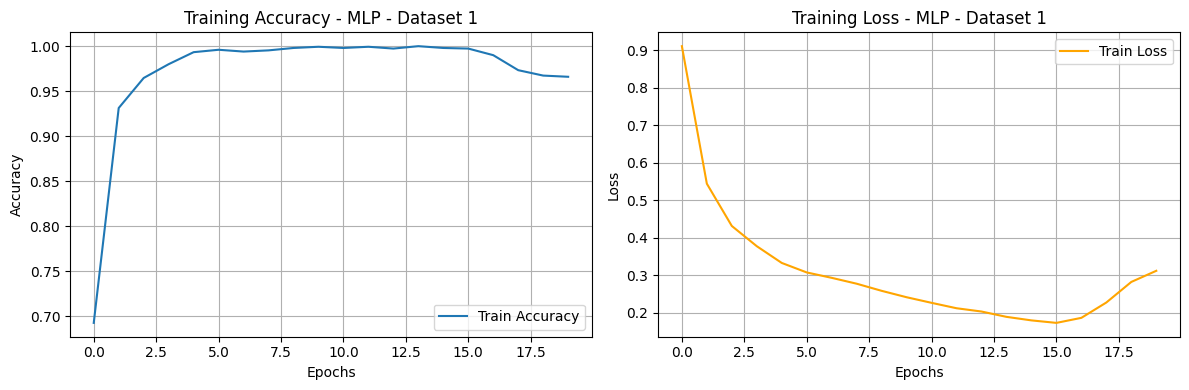

In [18]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy - MLP - Dataset 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Training Loss - MLP - Dataset 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [19]:
# Save to Drive
plt.savefig('/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_training_only_history.png')

<Figure size 640x480 with 0 Axes>